In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import numpy as np

# Data Importing

In [7]:
Data=read_excel('C:/Users/vista/Desktop/Amazon Revenue 2006-2021.xlsx')
Data.head(5)

,Quarter,Revenue
0,2005-03-31,1902
1,2005-06-30,1753
2,2005-09-30,1858
3,2005-12-31,2977
4,2006-03-31,2279


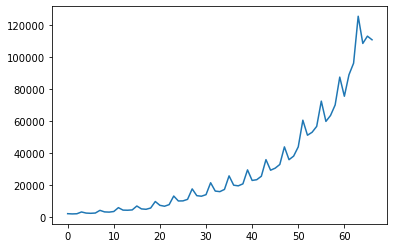

In [11]:
Data.Revenue.plot()
plt.show()

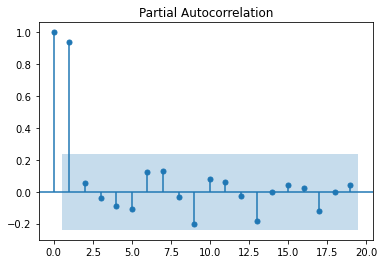

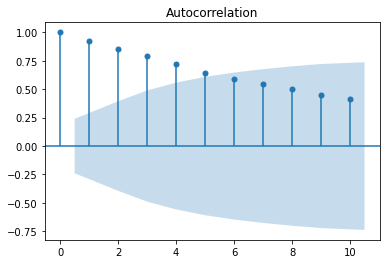

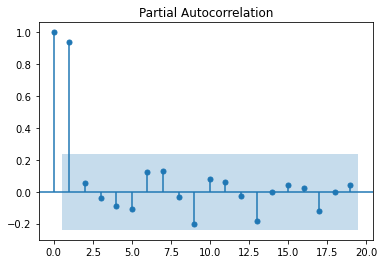

In [36]:
plot_acf(Data.Revenue,lags=10)
plot_pacf(Data.Revenue)

# Model Creation

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model=SARIMAX(Data.Revenue,order=(1,1,1),seasonal_order=(1,1,1,4)).fit()
print(Model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           Revenue   No. Observations:                   67
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -580.461
Date:                           Fri, 18 Feb 2022   AIC                           1170.922
Time:                                   09:11:33   BIC                           1181.558
Sample:                                        0   HQIC                          1175.098
                                            - 67                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4088      0.428      0.955      0.340      -0.431       1.248
ma.L1         -0.1439      0.395     -0.365

# Predict

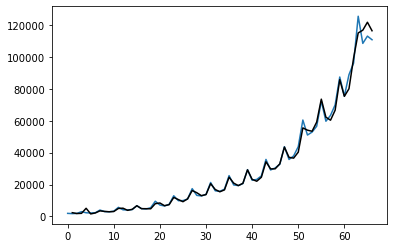

In [35]:
prediction=Model.predict(start=1,end=len(Data.Revenue)-1)
plt.plot(Data.Revenue)
plt.plot(prediction,color='black')
plt.show()

# Forcast

In [24]:
Forcast=Model.predict(start=len(Data.Revenue)-1,end=len(Data.Revenue)+3)
print(Forcast)

66    116450.512593
67    138033.904583
68    118844.288827
69    120913.809091
70    118233.747972
Name: predicted_mean, dtype: float64
